 this is a project in credit card fraud. First import packages

In [157]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from scipy.stats import norm

Read the data file

In [158]:
df = pd.read_csv('creditcard.csv')

display the first 5 rows

In [159]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

display the variables

In [160]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


display the basic information about the dataset

In [161]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

Check if there is null in the dataset

In [162]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Good, we don't have null. Now let's see the plots of variables.

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_3625/3513902229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_3625/3513902229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/var/folders/mp/yc2_4qzn1nbg

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_3625/3513902229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_3625/3513902229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/var/folders/mp/yc2_4qzn1nbg

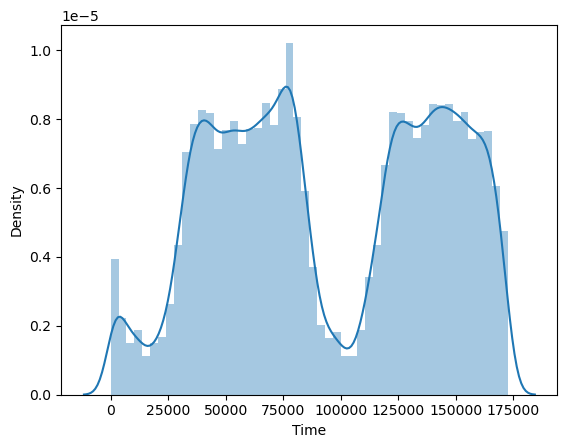

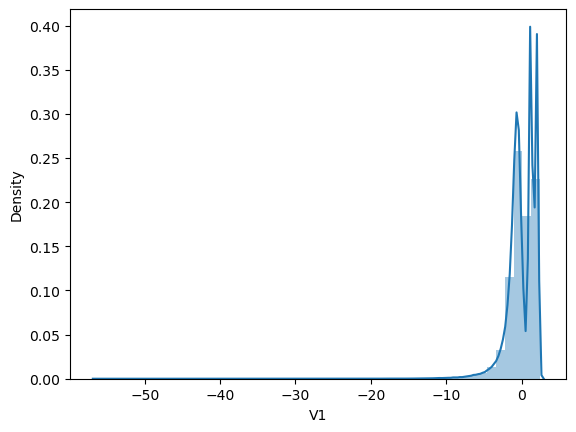

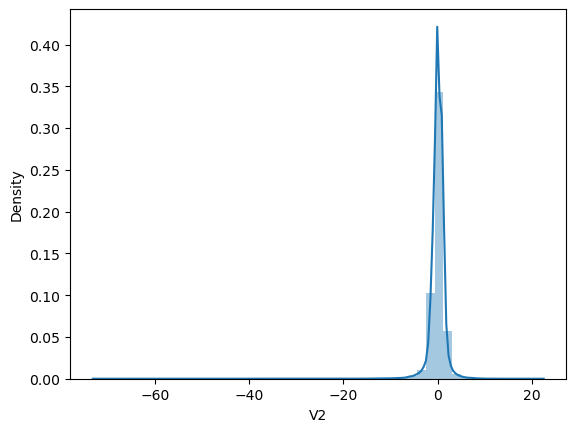

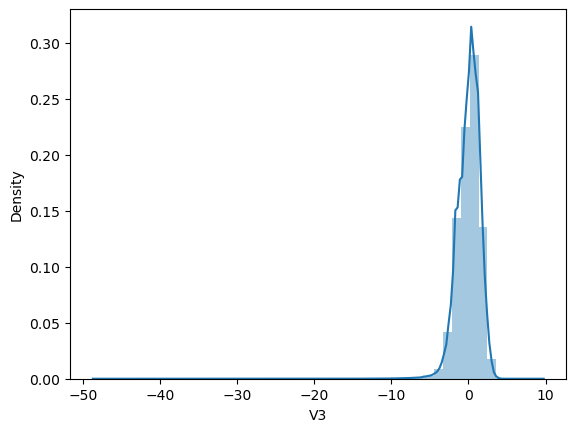

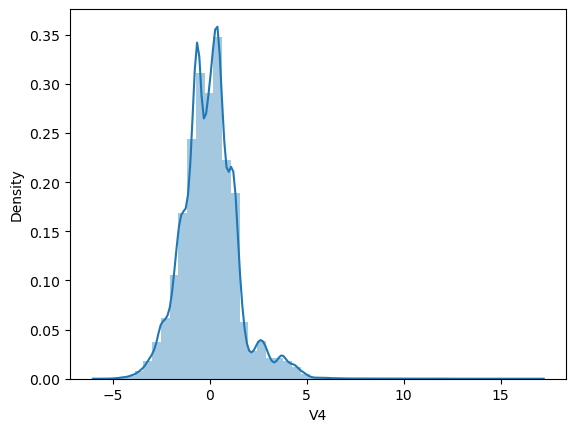

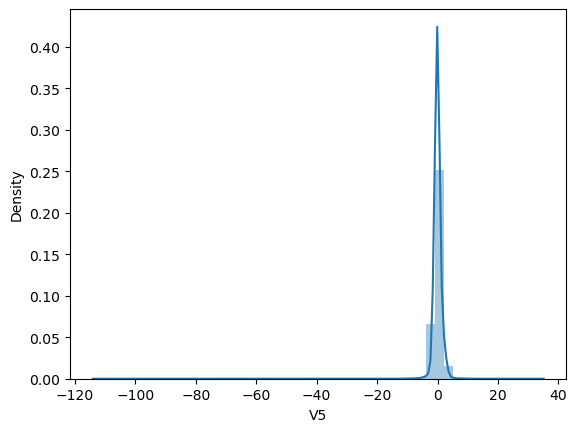

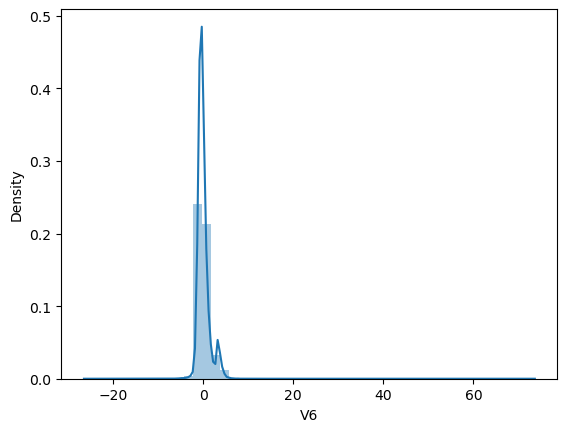

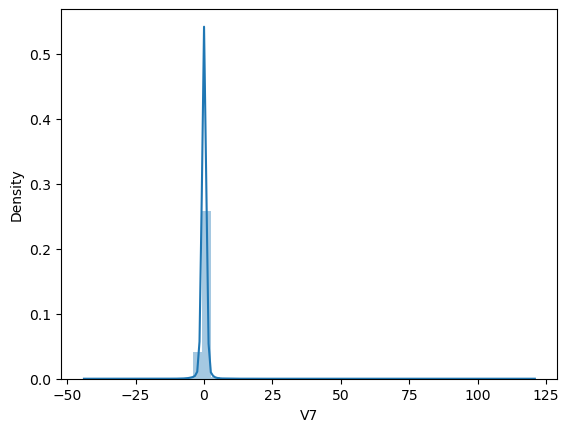

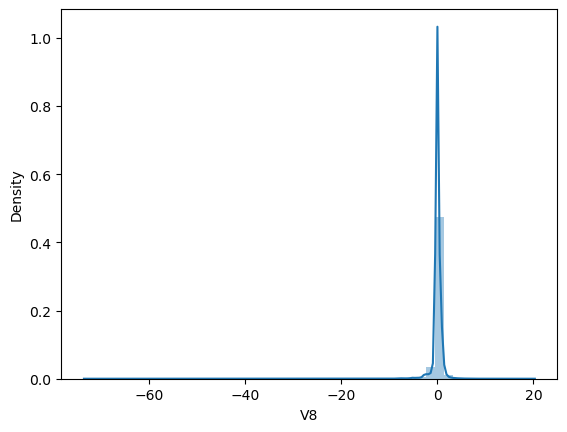

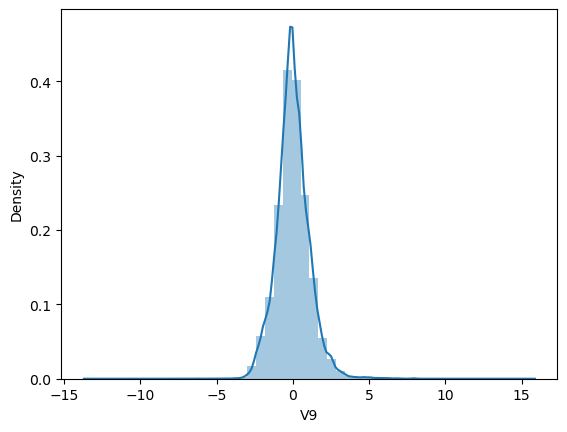

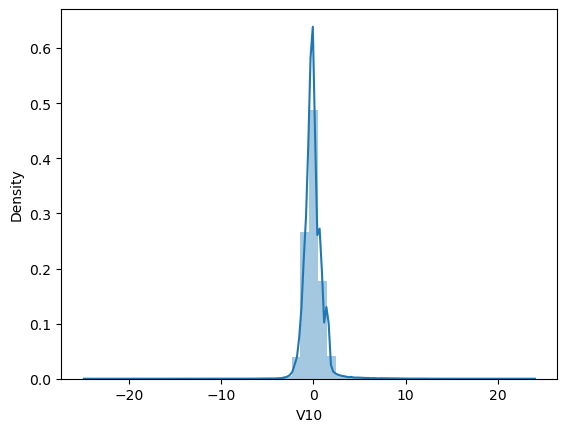

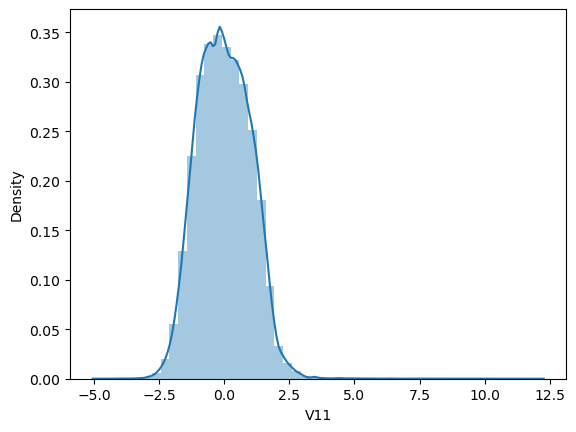

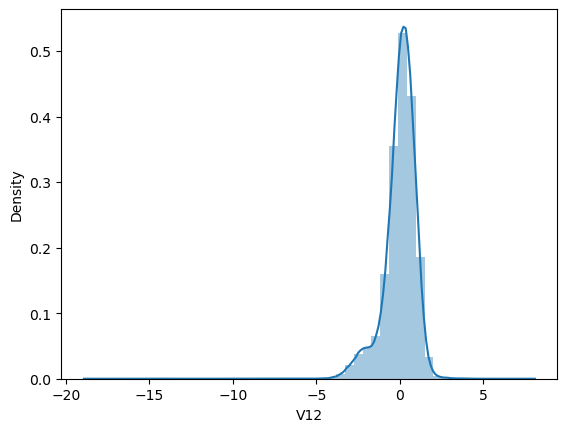

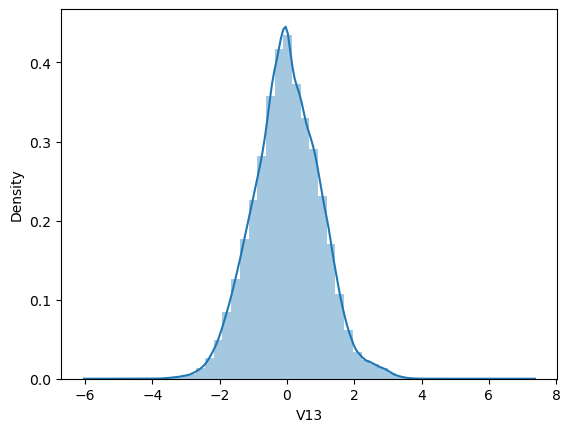

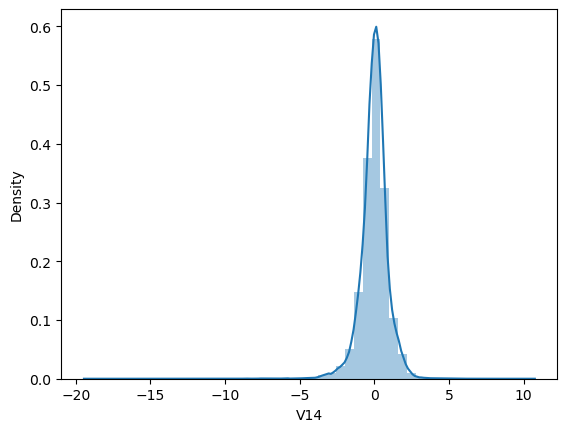

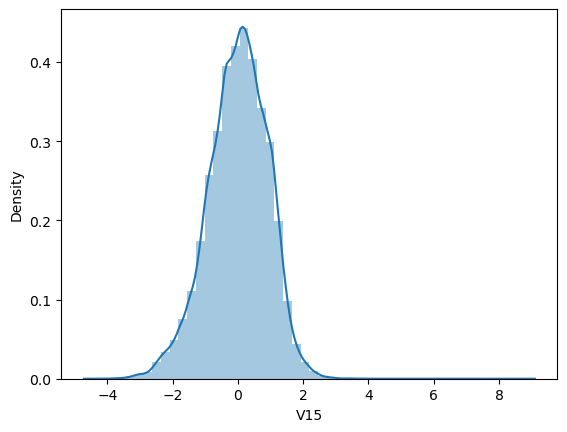

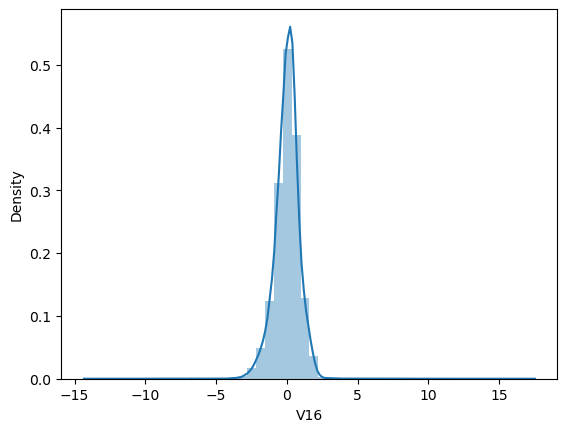

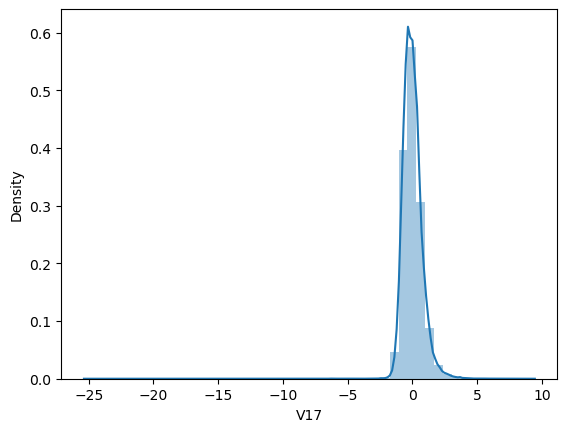

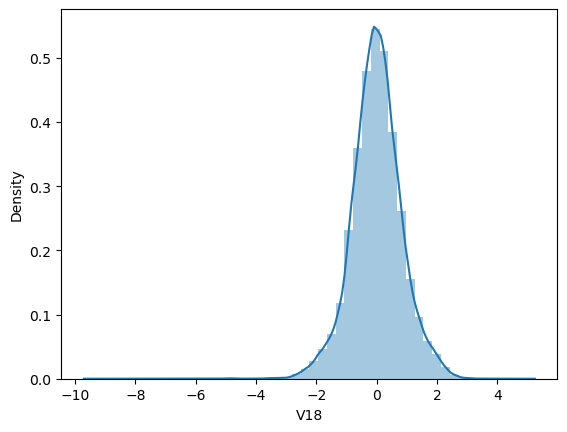

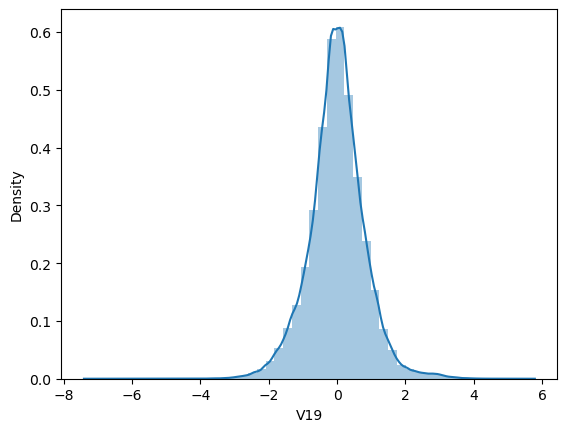

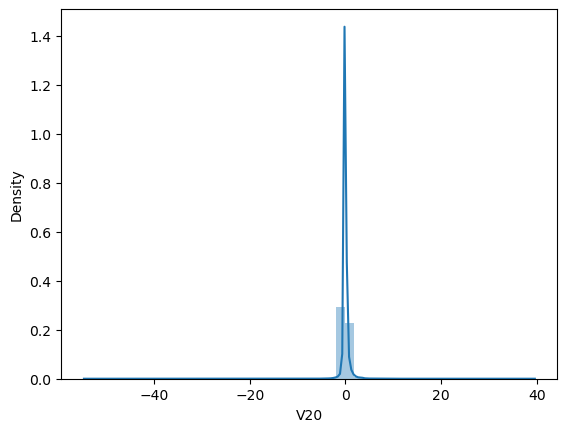

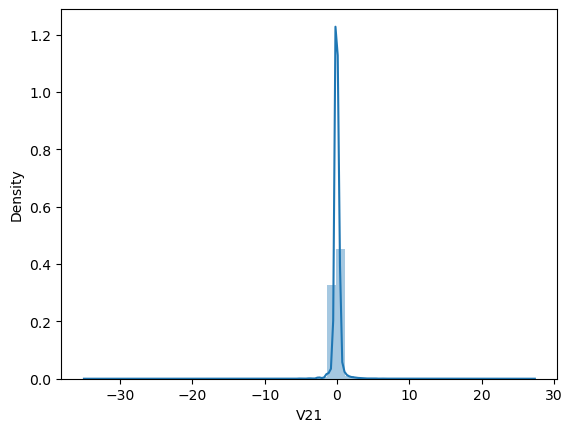

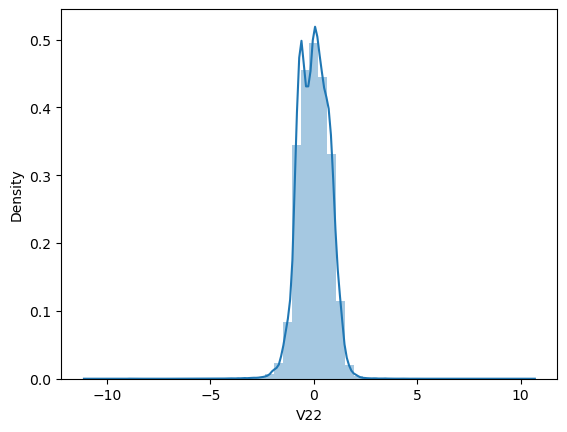

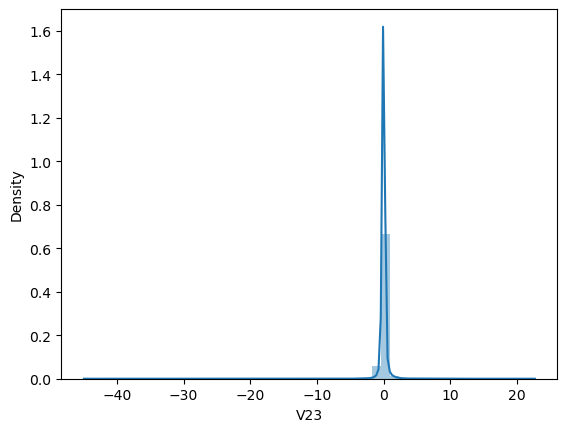

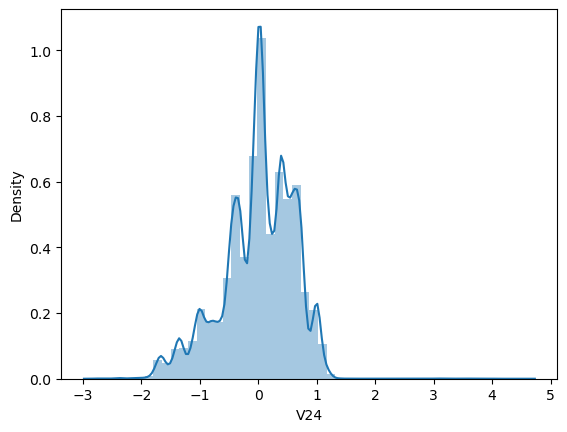

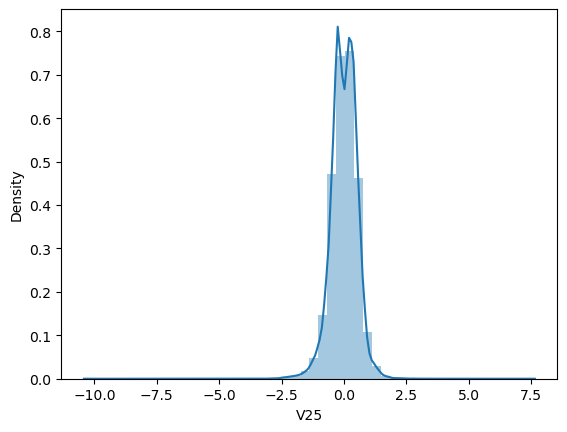

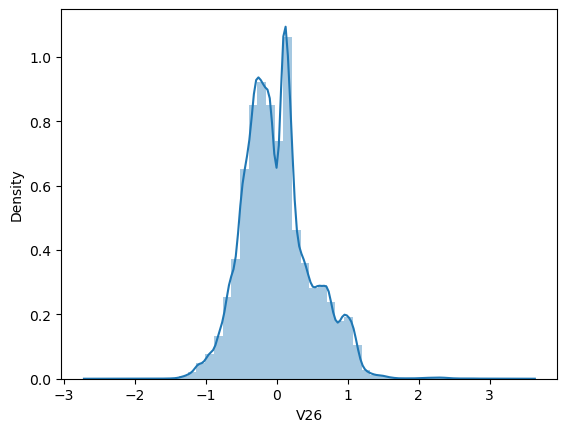

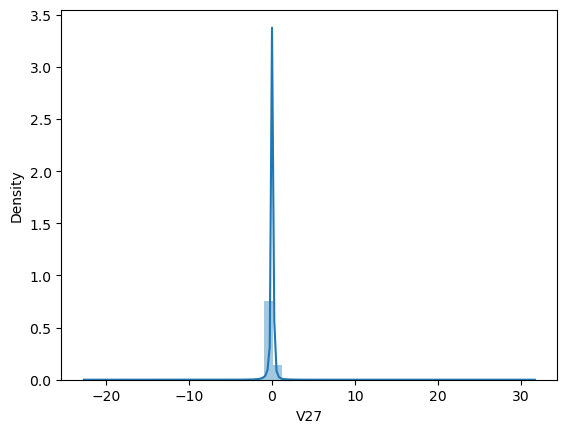

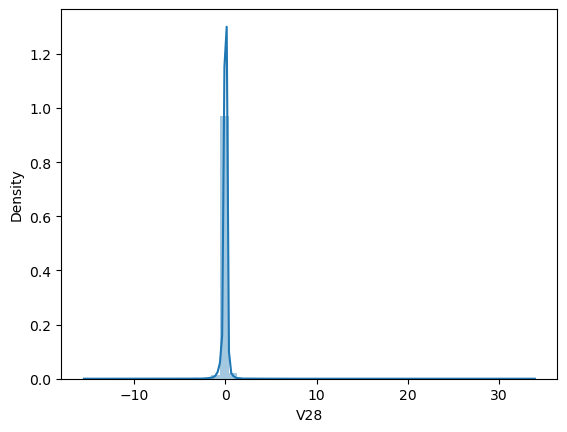

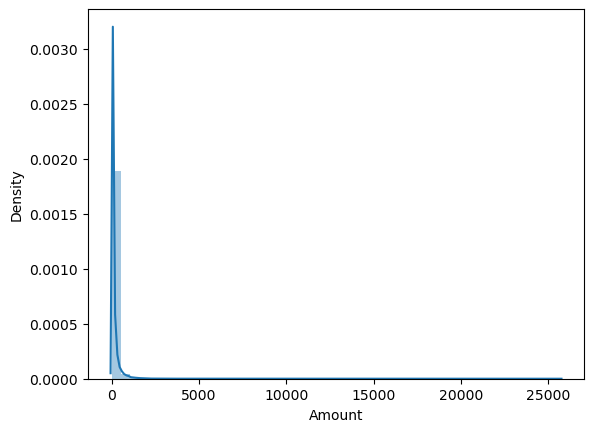

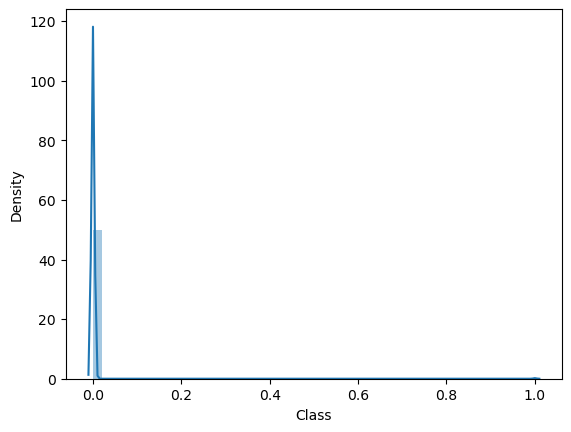

<Figure size 640x480 with 0 Axes>

In [163]:
for i in df.columns:
    sns.distplot(df[i])
    fig = plt.figure()

take a log on amount

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_3625/266639815.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Amount'].replace(0,0.01)))


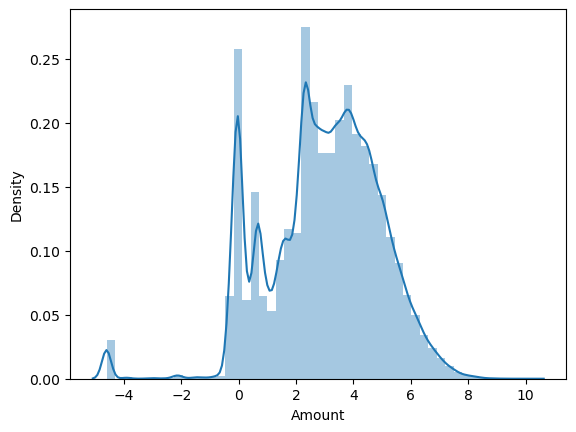

<Figure size 640x480 with 0 Axes>

In [164]:
sns.distplot(np.log(df['Amount'].replace(0,0.01)))
fig = plt.figure()

not normal. Let us find the proportion of fraud

In [165]:
count = len(df['Class'])
print(df[df == 0].count(axis = 0)/count)

Time      0.000007
V1        0.000000
V2        0.000000
V3        0.000000
V4        0.000000
V5        0.000000
V6        0.000000
V7        0.000000
V8        0.000000
V9        0.000000
V10       0.000000
V11       0.000000
V12       0.000000
V13       0.000000
V14       0.000000
V15       0.000000
V16       0.000000
V17       0.000000
V18       0.000000
V19       0.000000
V20       0.000000
V21       0.000000
V22       0.000000
V23       0.000000
V24       0.000000
V25       0.000000
V26       0.000000
V27       0.000000
V28       0.000000
Amount    0.006408
Class     0.998273
dtype: float64


99.8273% not fraud, 0.1727% fraud. Also, 0.6408% of transaction is 0. 0.0007% time is 0. Lets plot some scatter plots.

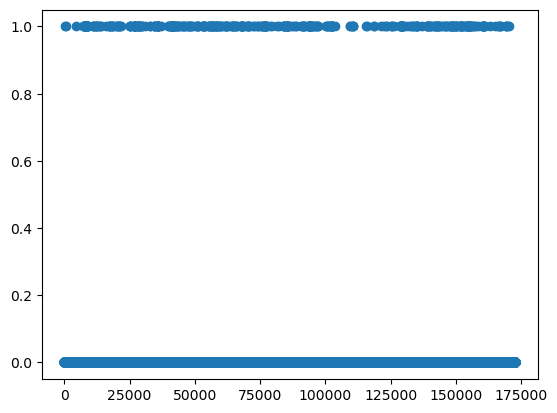

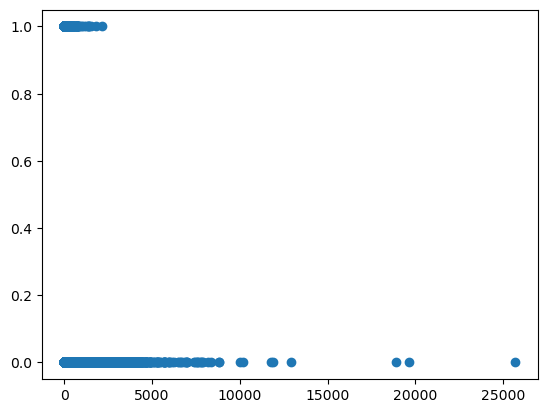

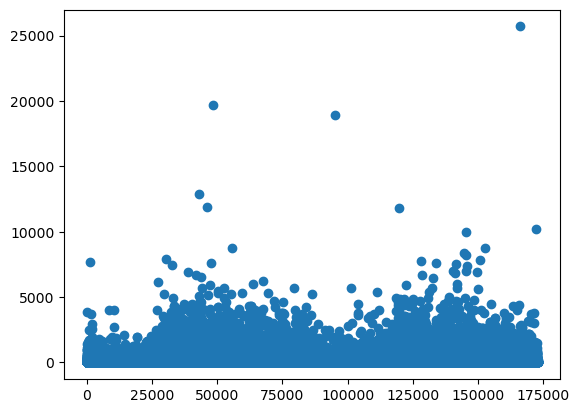

In [166]:
Time = df['Time'].tolist()
Amount = df['Amount'].tolist()
Class = df['Class'].tolist()

plt.scatter(Time, Class)
plt.show()
plt.scatter(Amount, Class)
plt.show()
plt.scatter(Time, Amount)
plt.show()

it seems all the fraud occur when amount < 5000. Lets display the correlation between variables.

<Axes: >

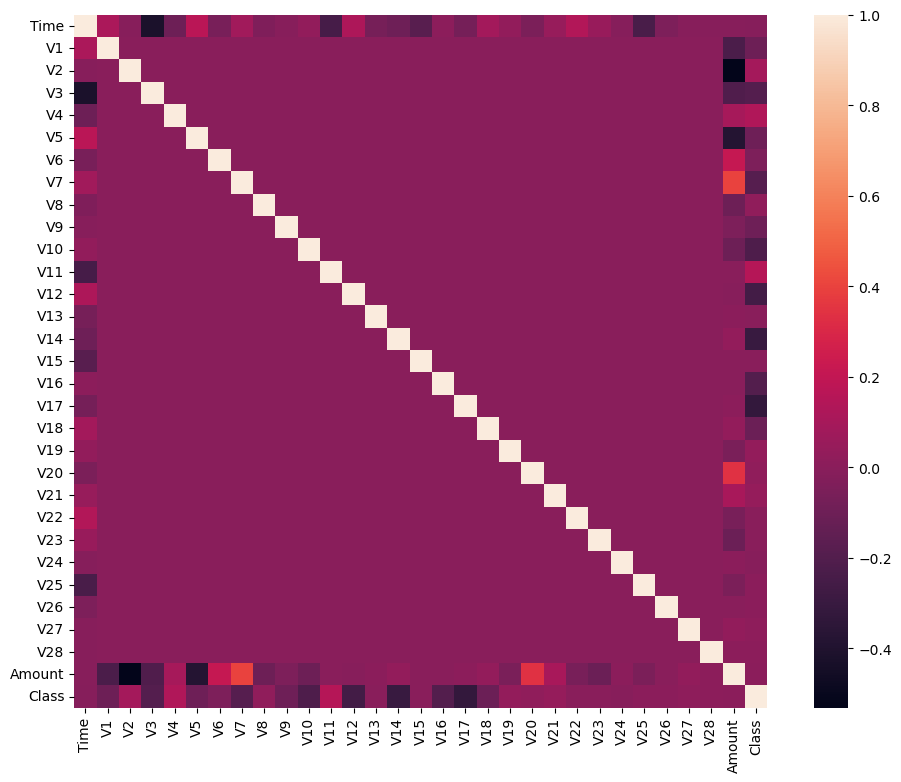

In [167]:
correlation_matrix = df.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(correlation_matrix, square = True)

Now, we need to scale our dataframe

In [168]:
from sklearn.preprocessing import RobustScaler

In [169]:
stradd = 'Scaled_'
new_df_columns = []
for i in df.columns[:-1]:
    new_index = stradd + i
    new_df_columns.append(new_index)
print(new_df_columns)

['Scaled_Time', 'Scaled_V1', 'Scaled_V2', 'Scaled_V3', 'Scaled_V4', 'Scaled_V5', 'Scaled_V6', 'Scaled_V7', 'Scaled_V8', 'Scaled_V9', 'Scaled_V10', 'Scaled_V11', 'Scaled_V12', 'Scaled_V13', 'Scaled_V14', 'Scaled_V15', 'Scaled_V16', 'Scaled_V17', 'Scaled_V18', 'Scaled_V19', 'Scaled_V20', 'Scaled_V21', 'Scaled_V22', 'Scaled_V23', 'Scaled_V24', 'Scaled_V25', 'Scaled_V26', 'Scaled_V27', 'Scaled_V28', 'Scaled_Amount']


In [170]:
df1 = df[df.columns[:-1]]
Scaled_df = RobustScaler().fit_transform(df1.to_numpy())
Scaled_df = pd.DataFrame(Scaled_df, columns = new_df_columns)
Scaled_df['Class'] = Class
print(Scaled_df.head())

   Scaled_Time  Scaled_V1  Scaled_V2  Scaled_V3  Scaled_V4  Scaled_V5  \
0    -0.994983  -0.616237  -0.098602   1.228905   0.878152  -0.217859   
1    -0.994983   0.524929   0.143100  -0.006970   0.293974   0.087726   
2    -0.994972  -0.615587  -1.002407   0.830932   0.251024  -0.344345   
3    -0.994972  -0.440239  -0.178789   0.841250  -0.529808   0.033775   
4    -0.994960  -0.526089   0.579239   0.713861   0.265632  -0.270695   

   Scaled_V6  Scaled_V7  Scaled_V8  Scaled_V9  ...  Scaled_V21  Scaled_V22  \
0   0.631245   0.177406   0.142432   0.334787  ...    0.026866    0.253109   
1   0.164395  -0.105740   0.117064  -0.164482  ...   -0.473332   -0.602719   
2   1.778007   0.668164   0.420388  -1.179796  ...    0.668917    0.714254   
3   1.303832   0.175637   0.662489  -1.076888  ...   -0.190105   -0.001408   
4   0.317183   0.491625  -0.546463   0.700808  ...    0.048266    0.739092   

   Scaled_V23  Scaled_V24  Scaled_V25  Scaled_V26  Scaled_V27  Scaled_V28  \
0   -0.320791  

Now we split out dataframe into train data and test data.

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
XXX = Scaled_df.drop('Class', axis = 1)
YYY = Scaled_df['Class']

XXX_train, XXX_test, YYY_train, YYY_test = train_test_split(XXX, YYY, test_size = 0.2, random_state = 77)

df_train = pd.concat([XXX_train, YYY_train], axis = 1)
df_test = pd.concat([XXX_test, YYY_test], axis = 1)
print(df_train.head())
print(df_test.head())
print(YYY_train[YYY_train == 1].count()/len(df_train))

        Scaled_Time  Scaled_V1  Scaled_V2  Scaled_V3  Scaled_V4  Scaled_V5  \
202304     0.582361   0.889621  -0.019790  -1.010888   0.756017   0.459612   
217725     0.661568   0.013814   0.604212   0.033721  -0.387988   0.492097   
47214     -0.488222  -0.428353  -0.259298   0.401422  -1.956454   1.721290   
69333     -0.367967  -0.952591  -0.395960   0.034360  -1.743783   1.322711   
120450    -0.104066   0.497807  -0.092939   0.566630   1.120587  -0.610170   

        Scaled_V6  Scaled_V7  Scaled_V8  Scaled_V9  ...  Scaled_V21  \
202304  -0.171144   0.253582  -0.137105   0.252157  ...    0.234106   
217725  -0.566678   0.890825  -0.442994  -0.080648  ...   -0.548256   
47214    3.269932  -0.073025   0.233042   0.096844  ...    0.234014   
69333    3.439209  -0.859495  -1.355990  -0.712026  ...    3.394173   
120450   0.354115  -0.418761   0.184961   0.998794  ...   -0.990956   

        Scaled_V22  Scaled_V23  Scaled_V24  Scaled_V25  Scaled_V26  \
202304    0.235104    0.223166    

Let's perform the logistic regression to this dataset.

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve, cross_val_predict, StratifiedKFold

In [174]:
logr = LogisticRegression(max_iter =1000)
logr.fit(XXX_train, YYY_train)

print(logr.intercept_)
print(logr.coef_)

[-8.64692383]
[[-0.17997149  0.13121749  0.02164102  0.06150005  1.12698428  0.15360172
  -0.12998338 -0.09175084 -0.09906173 -0.31638409 -0.82365675 -0.0318096
   0.00508204 -0.31694804 -0.49557782 -0.13379193 -0.28330509  0.00460387
   0.00936228 -0.00753605 -0.14862068  0.13703864  0.54670412 -0.01920733
   0.17159141 -0.07679398 -0.04900037 -0.11876532 -0.03183438  0.05472743]]


In [175]:
cvs = cross_val_score(logr, XXX_train, YYY_train, cv =7)
print(cvs.mean())
print(logr.score(XXX_test, YYY_test))

0.999192434454067
0.9991397773954567


In [176]:
YYY_train_predicted = cross_val_predict(logr, XXX_train, YYY_train, cv = 7, method = 'predict_proba')[:, 1]

RRRas = roc_auc_score(YYY_train, YYY_train_predicted)
print(RRRas)

0.9792410802509658


0.7663120606395678


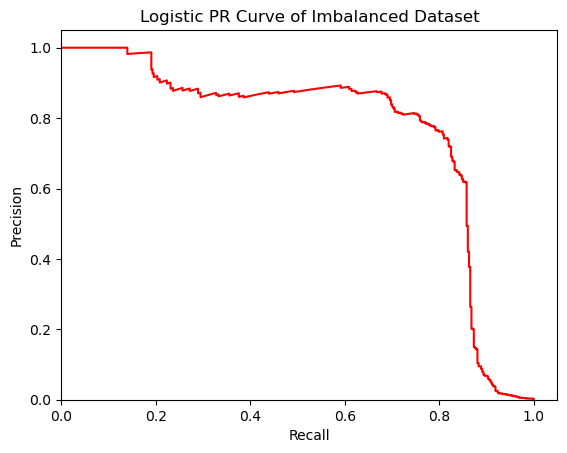

In [177]:
from sklearn.metrics import precision_recall_curve, average_precision_score

PPPrs = average_precision_score(YYY_train, YYY_train_predicted)

precision, recall, threshold = precision_recall_curve(YYY_train, YYY_train_predicted)
print(PPPrs)
plt.plot(recall, precision, color = 'r')

plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic PR Curve of Imbalanced Dataset')
plt.show()

We can see although cross-validation score and roc score is very good for the imbalanced dataset, it is purely because there are too many negative samples ('Class' = 0) in the dataset. Think about a classifier that classifies everything as negative, the cvs and roc score for this typical calssifier will be very high as well. However, when we plot the PR Curve, the score is relatively low. This is because the PR Curve also counts the number of Flase Negative instances.

Therefore, it is intuitive that we create a sample of equal fraud and non-fraud.

In [178]:
df_fraud = Scaled_df.loc[df['Class'] == 1]
df_nofraud = Scaled_df.loc[df['Class'] == 0]
fraud_number = (df['Class'] == 1).sum()
print(fraud_number)
df_nofraud_shuffle = df_nofraud.sample(frac=1, random_state = 77)[:fraud_number]
df_balanced = pd.concat([df_fraud, df_nofraud_shuffle], axis = 0).sample(frac = 1)
print(df_balanced.head())
print((df_balanced['Class'] == 1).sum()/len(df_balanced))

492
        Scaled_Time  Scaled_V1  Scaled_V2  Scaled_V3  Scaled_V4  Scaled_V5  \
58761     -0.424805   0.548180   0.327354  -0.374815   0.772021   0.409562   
154693     0.210611  -1.120955   3.061837  -4.149155   3.381869  -1.357506   
213092     0.639281  -2.095070  -2.865208   0.013688   3.249643   4.053479   
192584     0.529517  -1.096644   2.253812  -3.533723   2.269503  -0.786419   
234705     0.744628  -1.000587   0.472337  -2.940234   3.734149   3.058479   

        Scaled_V6  Scaled_V7  Scaled_V8  Scaled_V9  ...  Scaled_V21  \
58761    0.065782   0.008060   0.028795   0.144769  ...   -0.053547   
154693  -1.860508  -4.450219   2.728729  -2.335417  ...    3.267149   
213092   1.039736  -0.600381  -1.356152  -0.147840  ...   -1.530510   
192584  -1.255980  -0.077832   0.520670  -1.393286  ...   -0.014564   
234705  -2.409711  -1.527750   1.572304  -2.520351  ...    1.077512   

        Scaled_V22  Scaled_V23  Scaled_V24  Scaled_V25  Scaled_V26  \
58761    -0.084855   -0.586948

We now check the correlation in this balanced data set.

In [179]:
balanced_corr_matrix = df_balanced.corr()
print(balanced_corr_matrix)

               Scaled_Time  Scaled_V1  Scaled_V2  Scaled_V3  Scaled_V4  \
Scaled_Time       1.000000   0.243404  -0.214366   0.153430  -0.207140   
Scaled_V1         0.243404   1.000000  -0.825828   0.886105  -0.611059   
Scaled_V2        -0.214366  -0.825828   1.000000  -0.867294   0.683218   
Scaled_V3         0.153430   0.886105  -0.867294   1.000000  -0.763958   
Scaled_V4        -0.207140  -0.611059   0.683218  -0.763958   1.000000   
Scaled_V5         0.287176   0.869078  -0.803586   0.855917  -0.586058   
Scaled_V6         0.147704   0.336132  -0.287175   0.473017  -0.436453   
Scaled_V7         0.221448   0.890403  -0.853502   0.890316  -0.710924   
Scaled_V8        -0.143445  -0.096947  -0.009253  -0.184913   0.107688   
Scaled_V9         0.145434   0.662117  -0.696791   0.767511  -0.802081   
Scaled_V10        0.228551   0.741361  -0.768024   0.852768  -0.787637   
Scaled_V11       -0.321904  -0.523532   0.611992  -0.709172   0.787555   
Scaled_V12        0.276963   0.590568 

We select the correlation to class the highest and lowest 4 variables.

In [180]:
corr_to_class = balanced_corr_matrix['Class'].tolist()
indices = balanced_corr_matrix.columns.tolist()
print(corr_to_class)
positive_corr_indices = np.argsort(corr_to_class)[-5:-1]
negative_corr_indices = np.argsort(corr_to_class)[0:4]

positive_corr_to_class = []
negative_corr_to_class = []

for i in range(4):
    positive_corr_to_class.append([indices[positive_corr_indices[3-i]], corr_to_class[positive_corr_indices[3-i]]])
    negative_corr_to_class.append([indices[negative_corr_indices[i]], corr_to_class[negative_corr_indices[i]]])

print(positive_corr_to_class)
print(negative_corr_to_class)

[-0.14917610495278782, -0.42259786933678556, 0.477408171226634, -0.5586283349715665, 0.7053956696494598, -0.37319186522699915, -0.4176796661139403, -0.46801862534781485, 0.05838988337007056, -0.5594736538742449, -0.623034348208429, 0.6858674092956025, -0.6811458437692436, -0.09724785725065123, -0.7492821546450377, -0.021592649911246344, -0.5894735281429058, -0.5576832843874728, -0.46862425576377353, 0.2868410756033366, 0.16965337660206606, 0.12234220086330382, -0.007980122377670986, -0.02077748858484001, -0.10503068922657842, 0.03691269187117417, 0.047257865220621614, 0.07611282840828562, 0.07226897753923822, 0.0883667637258726, 1.0]
[['Scaled_V4', 0.7053956696494598], ['Scaled_V11', 0.6858674092956025], ['Scaled_V2', 0.477408171226634], ['Scaled_V19', 0.2868410756033366]]
[['Scaled_V14', -0.7492821546450377], ['Scaled_V12', -0.6811458437692436], ['Scaled_V10', -0.623034348208429], ['Scaled_V16', -0.5894735281429058]]


We then check if there are any multicollinearity. 

In [181]:
balanced_corr_matrix = balanced_corr_matrix.replace(1,0)
length = len(balanced_corr_matrix.columns)
level = 0.9
multicollinearity = []
for i in range(length):
    for j in range(i):
        if abs(balanced_corr_matrix.iloc[i, j]) > level:
            multicollinearity.append([indices[i], indices[j], balanced_corr_matrix.iloc[i, j]])

print(multicollinearity)

[['Scaled_V17', 'Scaled_V16', 0.9513166431428187], ['Scaled_V18', 'Scaled_V16', 0.9032339795196969], ['Scaled_V18', 'Scaled_V17', 0.9376940693807163]]


it seems we have some some variables that are highly correlated to each other in the balanced dataset. We now deal with the outliers. This can be seen easily from a boxplot.

[['Scaled_V4', 0.7053956696494598], ['Scaled_V11', 0.6858674092956025], ['Scaled_V2', 0.477408171226634], ['Scaled_V19', 0.2868410756033366]]


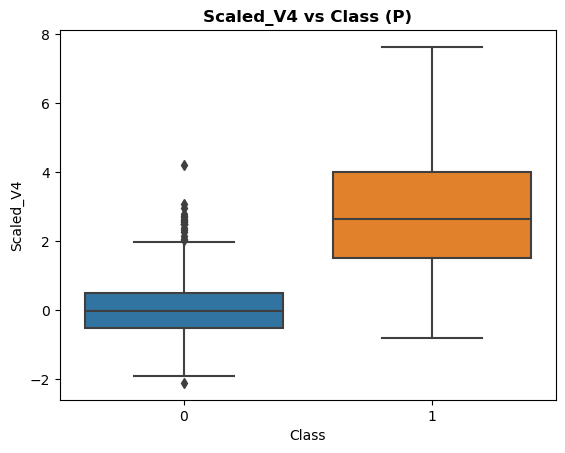

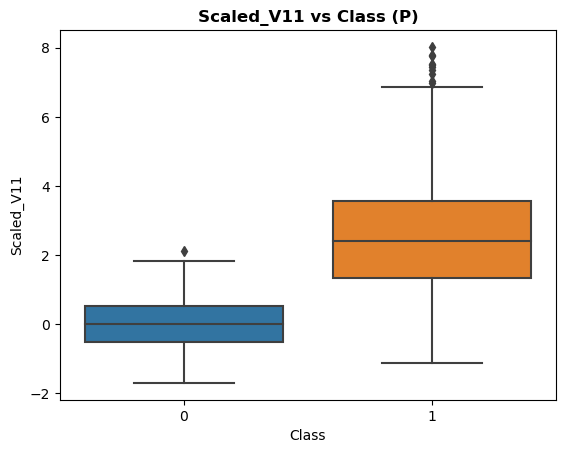

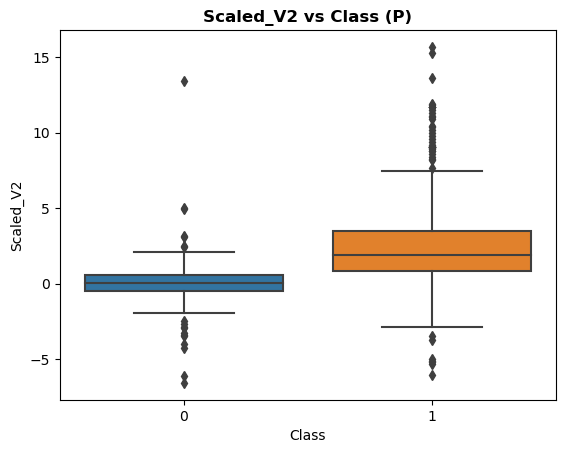

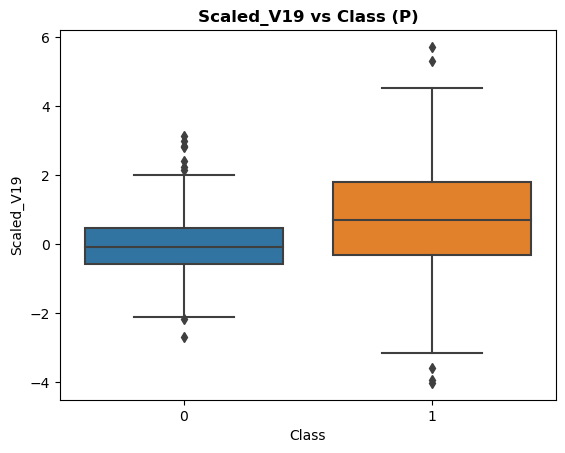

In [182]:
print(positive_corr_to_class)
for i in range(4):
    f, ax = plt.subplots()
    sns.boxplot(x = 'Class', y = positive_corr_to_class[i][0], data = df_balanced)
    ax.set_title(positive_corr_to_class[i][0]+ ' vs Class' + ' (P)', fontweight = 'bold')
    plt.show()

[['Scaled_V14', -0.7492821546450377], ['Scaled_V12', -0.6811458437692436], ['Scaled_V10', -0.623034348208429], ['Scaled_V16', -0.5894735281429058]]


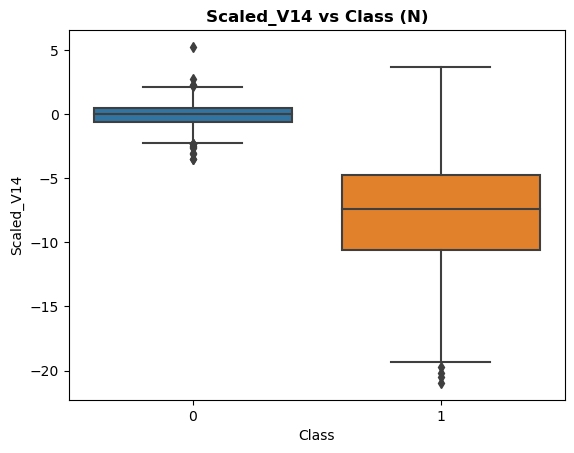

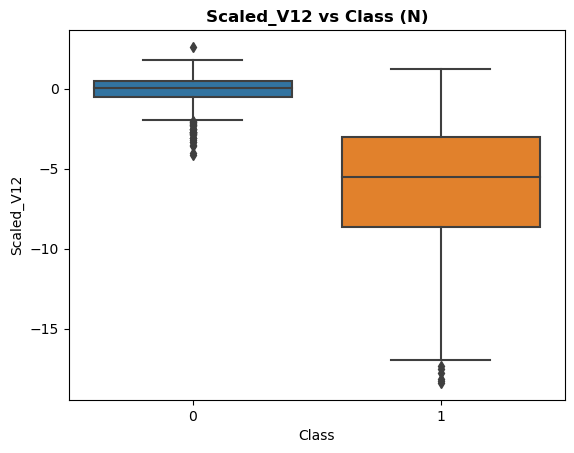

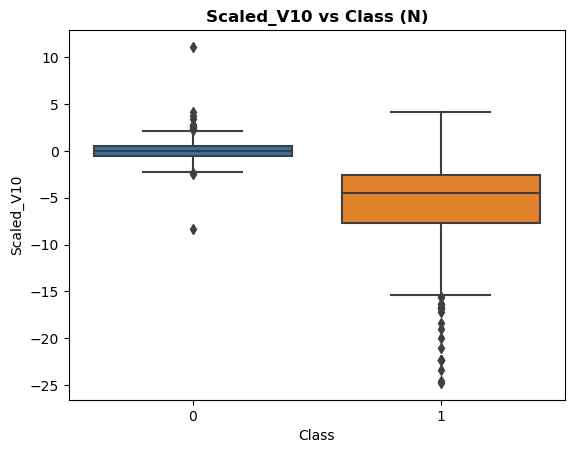

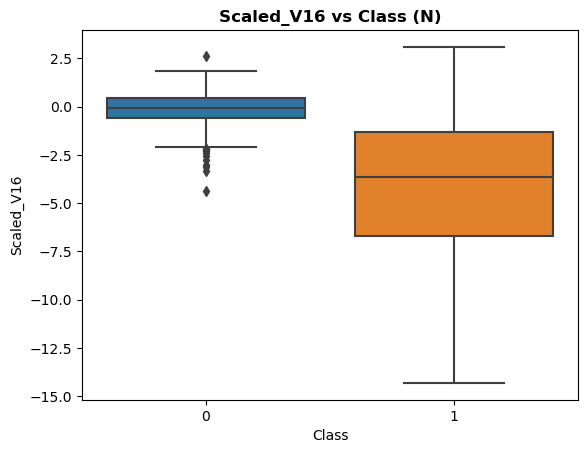

In [183]:
print(negative_corr_to_class)
for i in range(4):
    f, ax = plt.subplots()
    sns.boxplot(x = 'Class', y = negative_corr_to_class[i][0], data = df_balanced)
    ax.set_title(negative_corr_to_class[i][0]+ ' vs Class' + ' (N)', fontweight = 'bold')
    plt.show()

V10, V11, V12, V14 are highly correlated to Class. We would like to remove some outliers to improve the accuracy. We don't do it on V2, V16, V19, V20, becaude that would lose a lot of information or degrees of freedom.

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_3625/3949815080.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_balanced[outlier_indices[i]].loc[df_balanced['Class'] == 1].values, fit = norm, ax = axes[i])
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_3625/3949815080.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mw

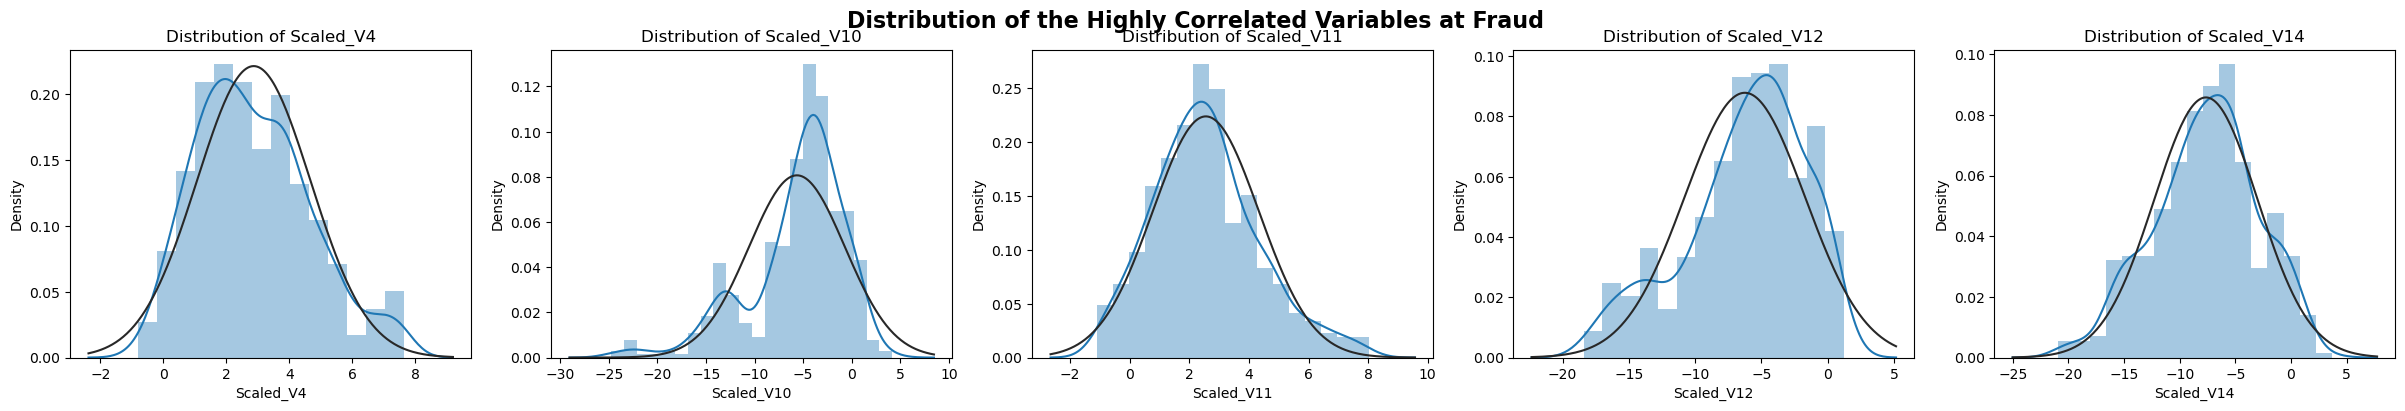

In [184]:
outlier_indices = ['Scaled_V4', 'Scaled_V10', 'Scaled_V11', 'Scaled_V12', 'Scaled_V14']
f, axes = plt.subplots(ncols = 5, figsize=(30, 4))
for i in range(5):
    sns.distplot(df_balanced[outlier_indices[i]].loc[df_balanced['Class'] == 1].values, fit = norm, ax = axes[i])
    axes[i].set_title('Distribution of ' + outlier_indices[i])
    axes[i].set_xlabel(outlier_indices[i])
f.suptitle('Distribution of the Highly Correlated Variables at Fraud', fontsize=16, fontweight = 'bold')
plt.show()

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_3625/1262102498.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_balanced[outlier_indices[i]].loc[df_balanced['Class'] == 0].values, fit = norm, ax = axes[i])
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_3625/1262102498.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mw

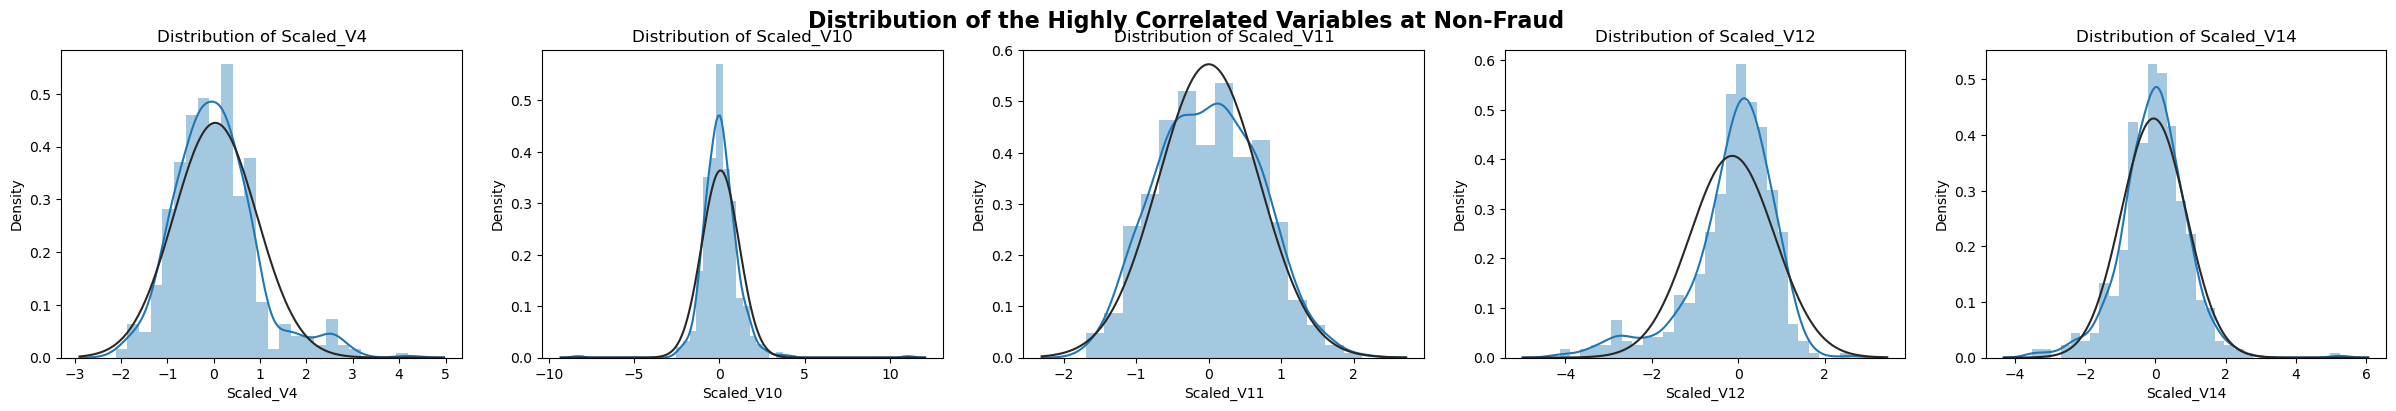

In [185]:
f, axes = plt.subplots(ncols = 5, figsize=(30, 4))
for i in range(5):
    sns.distplot(df_balanced[outlier_indices[i]].loc[df_balanced['Class'] == 0].values, fit = norm, ax = axes[i])
    axes[i].set_title('Distribution of ' + outlier_indices[i])
    axes[i].set_xlabel(outlier_indices[i])
f.suptitle('Distribution of the Highly Correlated Variables at Non-Fraud', fontsize=16, fontweight = 'bold')
plt.show()

We can see at fraud cases, only variable V14 is close to normal distribution. However, at non-fraud cases, all 4 variables are close to norm distribution. This is intuitive because this a highly inbalanced dataset and the non-fraud cases are drawn randomly from a large population. The inbalanced dataset means that there is only certain parttern could trigger fraud and most random combination of values in the variables would be non-fraud. Therefore, in the non-fraud cases, variables will likely be normally distributed. However, in the cases of fraud, variables should display certain pattern to trigger the fraud.

We now would like to remove the extreme outliers. This is done by putting a threshold on the variables. Any values exceeding the threshold will be automatically deleted. The threshold is set by T*(75 percentile - 25 percentile), where T is a constant. We can set higher T to exclude only the most extreme outliers by losing the accuracy, or we can set lower T to exclude most outliers by losing the information or degrees of freedom.

In [186]:
fraud_data_list = []
for i in outlier_indices:
    fraud_data_list.append(df_balanced[i].loc[df_balanced['Class'] == 1].values)

percentile_25 = np.percentile(fraud_data_list, 25, axis = 1)
percentile_75 = np.percentile(fraud_data_list, 75, axis = 1)
percentile_difference = []
for i in range(5):
    percentile_difference.append(percentile_75[i] - percentile_25[i])

T = 1.5
Threshold = [T * percentile_difference[i] for i in range(5)]

Lower_threshold = [percentile_25[i] - Threshold[i] for i in range(5)]
Upper_threshold = [percentile_75[i] + Threshold[i] for i in range(5)]

print('Upper Thresholds are', Upper_threshold)
print('Lower Thresholds are', Lower_threshold)

Upper Thresholds are [7.746381853814469, 5.248404801131782, 6.883990217558612, 5.3301049003379655, 4.115960368706195]
Lower Thresholds are [-2.2428803583808445, -15.543099198090895, -1.993470546243325, -16.994706087676164, -19.43802507206913]


/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_3625/3692812454.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud_data_list[i], ax = axes[i])
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_3625/3692812454.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud_da

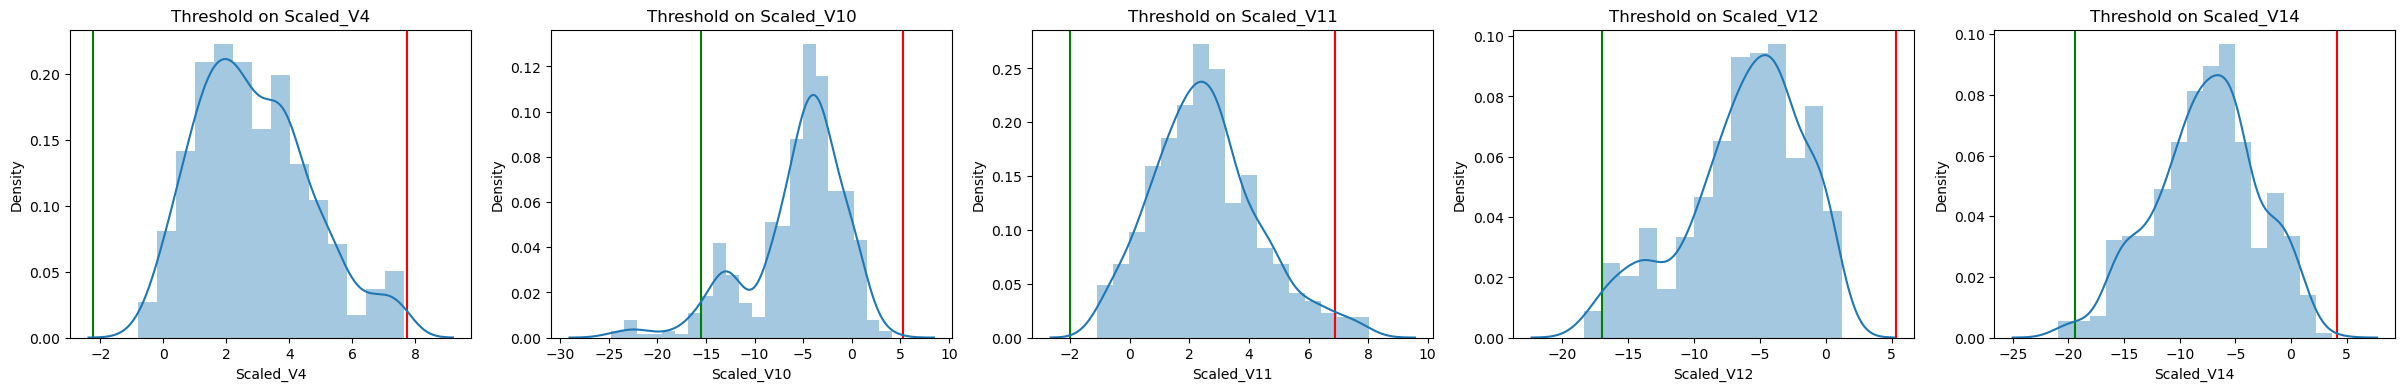

In [187]:
f, axes = plt.subplots(ncols = 5, figsize = (30,4))

for i in range(5):
    axes[i].axvline(x = Lower_threshold[i], color = 'green')
    axes[i].axvline(x = Upper_threshold[i], color = 'red')
    sns.distplot(fraud_data_list[i], ax = axes[i])
    axes[i].set_xlabel(outlier_indices[i])
    axes[i].set_title('Threshold on ' + outlier_indices[i])

plt.show()

Comparing to the boxplots of these variables, we can see that the extreme outliers of V10, V12, and V14 passes throught the lower threshold and the extreme outliers of V11 passes the upper threshold. The boxplots are consistent with the threshold plots in all the variables.

In [188]:
outlier_elements = [[outlier_indices[i]] for i in range(5)]
eliminate_indices_d = []
for i in range(5):
    for indices, values in enumerate(df_balanced[outlier_indices[i]]):
        if values < Lower_threshold[i] or values > Upper_threshold[i]:
            outlier_elements[i].append(values)
            eliminate_indices_d.append(indices)
    print(outlier_elements[i], 'count is', len(outlier_elements[i])-1)
eliminate_indices = list(set(eliminate_indices_d))
print(eliminate_indices)

['Scaled_V4'] count is 0
['Scaled_V10', -16.68599929746956, -22.332025751777895, -15.637425490133717, -21.080802176590016, -19.955777024117175, -16.73495187610898, -15.637425490133717, -18.373948562862854, -22.332025751777895, -24.75904943976854, -16.336693686081375, 11.09173657455413, -16.38513554184591, -22.332025751777895, -22.332025751777895, -17.232132745970617, -23.384400690377735, -24.571979522916788, -19.02293597741207, -16.83240578684039] count is 20
['Scaled_V11', 7.446468456283821, 7.529972327154136, 6.976693069856236, 7.042212644007624, 8.02328074166663, 7.247093300121521, 7.362963669658261, 7.757524133673799, 7.49705117918821, 7.790465794557108] count is 10
['Scaled_V12', -17.492683677993842, -17.764661133230458, -17.358345066149475, -18.38598575572975, -18.25899179702598, -18.139276186411564] count is 6
['Scaled_V14', -20.969224391850393, -20.542285717191973, -19.70189277135501, -20.18492764587946, 5.249459474799662] count is 5
[512, 130, 900, 903, 905, 908, 268, 782, 915

In [189]:
df_balanced_reset = df_balanced.reset_index(drop = False)
new_df_reset = df_balanced_reset.drop([df_balanced_reset.index[i] for i in eliminate_indices])
new_df = new_df_reset.set_index('index')
print(new_df.head())

        Scaled_Time  Scaled_V1  Scaled_V2  Scaled_V3  Scaled_V4  Scaled_V5  \
index                                                                        
58761     -0.424805   0.548180   0.327354  -0.374815   0.772021   0.409562   
154693     0.210611  -1.120955   3.061837  -4.149155   3.381869  -1.357506   
213092     0.639281  -2.095070  -2.865208   0.013688   3.249643   4.053479   
192584     0.529517  -1.096644   2.253812  -3.533723   2.269503  -0.786419   
234705     0.744628  -1.000587   0.472337  -2.940234   3.734149   3.058479   

        Scaled_V6  Scaled_V7  Scaled_V8  Scaled_V9  ...  Scaled_V21  \
index                                               ...               
58761    0.065782   0.008060   0.028795   0.144769  ...   -0.053547   
154693  -1.860508  -4.450219   2.728729  -2.335417  ...    3.267149   
213092   1.039736  -0.600381  -1.356152  -0.147840  ...   -1.530510   
192584  -1.255980  -0.077832   0.520670  -1.393286  ...   -0.014564   
234705  -2.409711  -1.52775

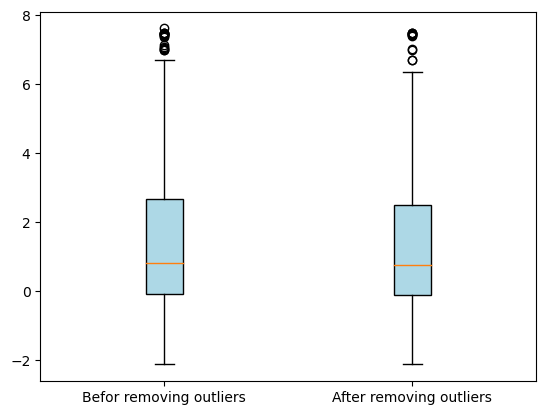

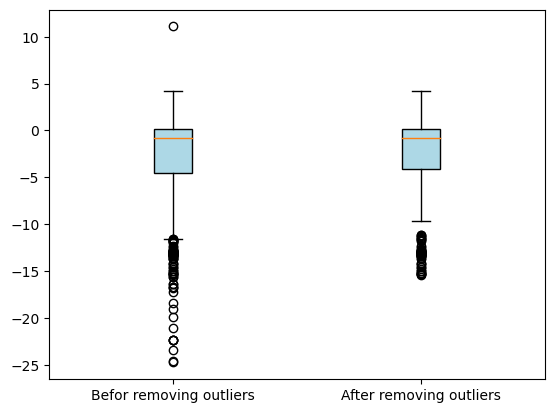

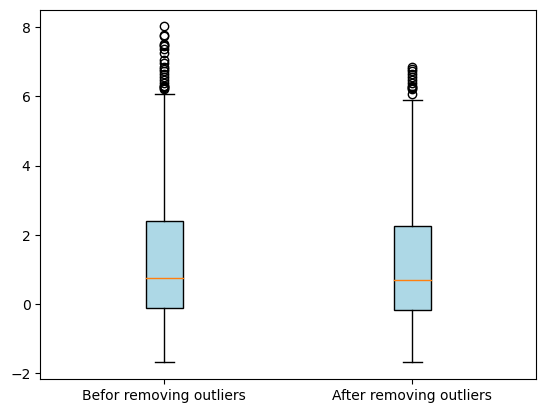

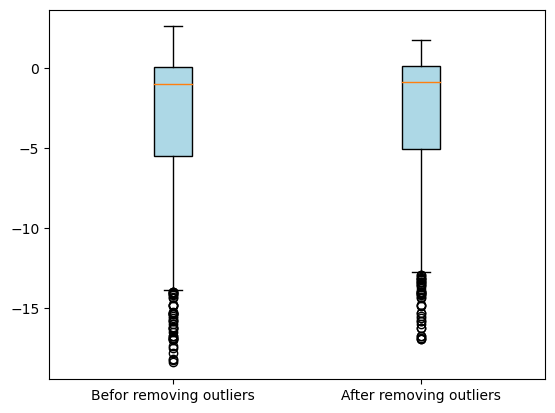

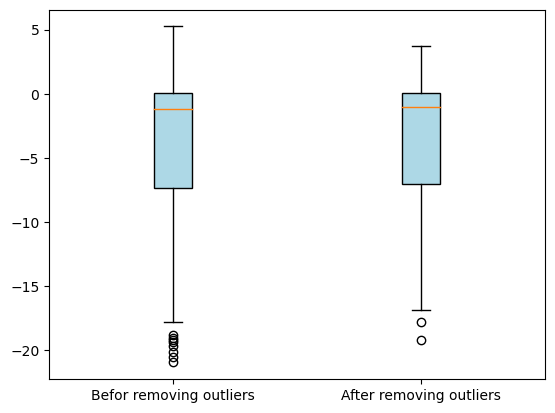

In [190]:
#f, axes = plt.subplots(ncols = 5, figsize = [30, 4])

for i in range(5):
    my_dict = {'Befor removing outliers': df_balanced[outlier_indices[i]], 'After removing outliers': new_df[outlier_indices[i]]}
    f, ax = plt.subplots()
    ax.boxplot(my_dict.values(), patch_artist = True, boxprops = dict(facecolor = "lightblue"))
    ax.set_xticklabels(my_dict.keys())
plt.show()

The boxplots after removing outliers is much shorter than before removing the outliers. The outliers are deduced significantly.

Now, logistic regression. p(x) = 1/(1+e^(-f(x)) where f(x) = b_0 + sum_1^n b_i x_i. b_i are the estimators.

In [191]:
X = new_df.drop('Class', axis = 1)
y = new_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [192]:
model_logistic = LogisticRegression(solver = 'liblinear', random_state = 7)

model_logistic.fit(X_train, y_train)

print(model_logistic.intercept_)
print(model_logistic.coef_)

[-3.56703581]
[[-0.54074957  0.11418489 -0.53670893 -0.3051761   1.46098085  0.08569382
  -0.20844142  0.40985691 -0.4458475  -0.29113222 -0.49895389  0.64624682
  -0.92613533 -0.28308067 -1.27557833 -0.08923145 -0.46091279 -0.33985884
  -0.36726195  0.03555967 -0.04003233 -0.12004012  0.32490931 -0.14497401
  -0.14108765 -0.02042798 -0.48102961  0.12910285  0.25566254 -0.0575777 ]]


We can test the accuracy of the model by several methods. 1. We can use the cross-validation method to split the dataset into n parts. Using n-1 parts to train and 1 part to test iteratively, it will return an array of n testing scores. 2. As the 'Class' variable only takes 0 or 1, we can use Receiver Operating Characteristic Area Under the Curve (ROC AUC) score, which is to evaluate the performance of a binary classification model. As the splitted test dataset is small, we will be using the cross-validation method to predict the training dataset and obtain the predicted value for y_train. 3. We could also check the training accuracy by predicting the test dataset we splitted before. It will give us a score on the accuracy as well as the details on Positive True, Negative True, Positive False, and Negative False. 

In [193]:
cvs = cross_val_score(model_logistic, X_train, y_train, cv = 10)

roc_cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 77)
y_train_predicted = cross_val_predict(model_logistic, X_train, y_train, cv = roc_cv, method = 'predict_proba')[:, 1]
ras = roc_auc_score(y_train, y_train_predicted)

print('The cvs score of the model is', cvs.mean())
print('The ras score of the model is', ras)
print('By predicting the test data, we have an accuracy of', model_logistic.score(X_test, y_test))
print(classification_report(y_test, model_logistic.predict(X_test)))

The cvs score of the model is 0.9486315789473686
The ras score of the model is 0.9781803755620206
By predicting the test data, we have an accuracy of 0.9263157894736842
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        92
           1       0.99      0.87      0.92        98

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



This is a very good result.

Let's do gridsearch to find the best parameter in the logistic regression. Penalties are specified by L1 or L2 regularization. L1 (Lasso) tends to force the coefficients of irrelevant features to 0, while L2 (Ridge) prevents a single feature to dominate the prediction. C is the hyperparameter that controls the strength of these regularizations. Smaller C means higher strength.

In [194]:
grid_parameter_log = {
    'penalty' : ['l1', 'l2'],
    'C' : [0.01, 0.1, 1, 10, 100] 
}

gs = GridSearchCV(estimator = model_logistic, param_grid = grid_parameter_log, cv = 10, scoring = 'accuracy')

gs.fit(X_train, y_train)

bestparameters_logistic = gs.best_params_
bestmodel_logistic = gs.best_estimator_
cvs_score_log = cross_val_score(bestmodel_logistic, X_train, y_train, cv = 10)
best_training_score_log = bestmodel_logistic.score(X_test, y_test)

print(bestparameters_logistic)
print('cvs score under this logistic regression is', cvs_score_log.mean())
print('The best training score is', best_training_score_log)

{'C': 0.1, 'penalty': 'l2'}
cvs score under this logistic regression is 0.9486315789473686
The best training score is 0.9052631578947369


We can see by using the grid search, the cvs score increases. 

We would like to see how the logistic regression behaves when we vary the training size. This can be done by learning_curve.

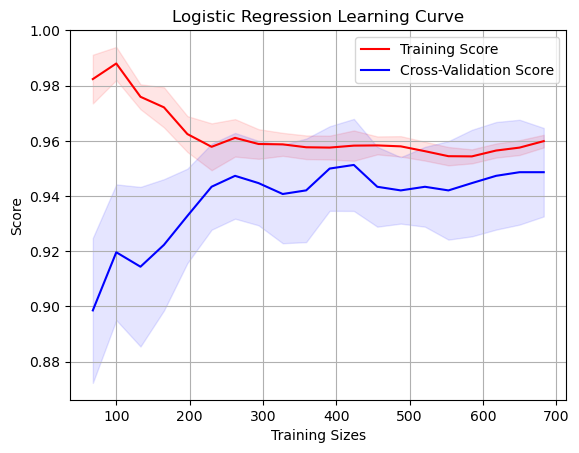

In [195]:
training_sizes = np.linspace(0.1, 1.0, 20)

training_sizes, training_score, test_score = learning_curve(
    bestmodel_logistic, X_train, y_train, cv = 10, train_sizes = training_sizes, scoring = 'accuracy'
)

training_score_mean = np.mean(training_score, axis = 1)
training_score_std = np.std(training_score, axis = 1)
test_score_mean = np.mean(test_score, axis = 1)
test_score_std = np.std(test_score, axis = 1)

plt.figure()

plt.title('Logistic Regression Learning Curve')
plt.xlabel('Training Sizes')
plt.ylabel('Score')
plt.grid()

plt.plot(training_sizes, training_score_mean, color = 'r', label = 'Training Score')
plt.plot(training_sizes, test_score_mean, color = 'b', label = 'Cross-Validation Score')

plt.fill_between(
    training_sizes, training_score_mean - training_score_std, training_score_mean + training_score_std, alpha = 0.1, color = 'r'
)
plt.fill_between(
    training_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, alpha = 0.1, color = 'b'
)


plt.legend()
plt.show()



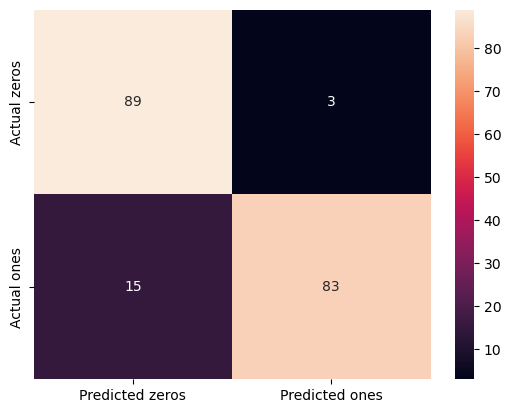

In [196]:
df_confusion_matrix = confusion_matrix(y_test, bestmodel_logistic.predict(X_test))

xlabels = ['Predicted zeros', 'Predicted ones']
ylabels = ['Actual zeros', 'Actual ones']
ax = sns.heatmap(df_confusion_matrix, annot = True, xticklabels = xlabels, yticklabels = ylabels)

plt.show()

We will plot a ROC curve

0.9780968554684781


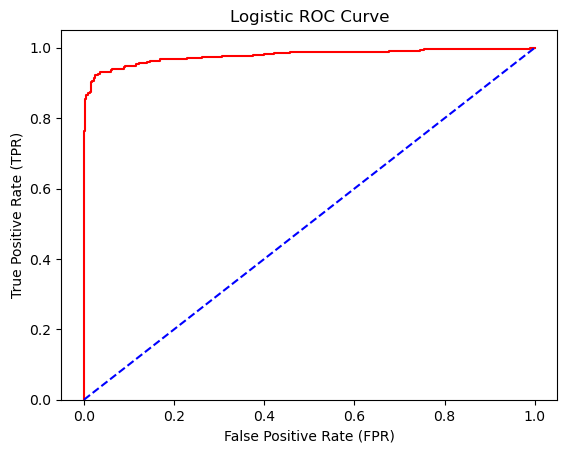

In [197]:
from sklearn.metrics import roc_curve

bestmodel_y_train_predicted = cross_val_predict(bestmodel_logistic, X_train, y_train, cv = roc_cv, method = 'predict_proba')[:, 1]
bestmodel_ras = roc_auc_score(y_train, bestmodel_y_train_predicted)
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_train, bestmodel_y_train_predicted)
print(bestmodel_ras)
plt.figure()
plt.plot(fpr_logistic, tpr_logistic, color = 'r')
plt.plot([0, 1], [0, 1], color = 'b', linestyle = '--')
plt.xlim(-0.05, 1.05)
plt.ylim(0, 1.05)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Logistic ROC Curve')

plt.show()

We can intepret this graph as following. FPR is the propotion of negative samples are incorrectly classified as positive, and TPR is the propotion of positive samples are correctly classified as positive. This plot is plotted as the threshold changes. The dashed line will represent a random classifier that has no ability to classify. Therefore, there will be an equal chance of classifing the negative sample as positive and classifing the positive sample as positive. The roc_auc score is calculated as the area under the cure. For example, a random classifier will have a score equals to the area under the dashed line, which is 0.5. In the logistic regression model we performed, the area is 0.979257869501772. The higher the score, the better the performance of the classifier is. For a perfect classification (TPR = 1, and FPR = 0), the area or the score is 1.

We could look more into this by plotting a Presicion Recall Curve (PRC). Precision is defined as True Positives/(True Positives + False Positives). Recall is defined as True Positives/(True Positives + False Negatives).

0.9828452226378853


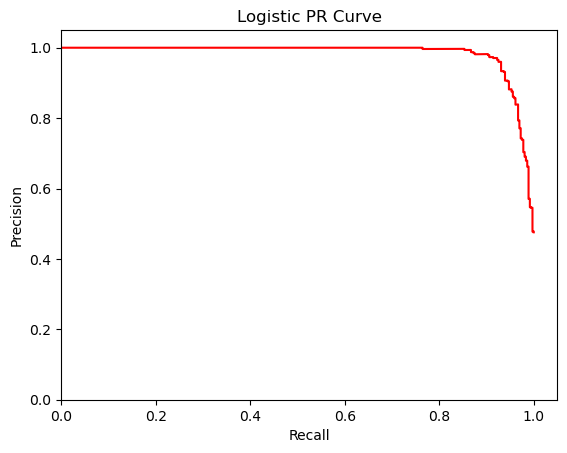

In [198]:
from sklearn.metrics import precision_recall_curve, average_precision_score

prs = average_precision_score(y_train, bestmodel_y_train_predicted)

precision, recall, _ = precision_recall_curve(y_train, bestmodel_y_train_predicted)
print(prs)
plt.plot(recall, precision, color = 'r')

plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic PR Curve')
plt.show()

Similar to the ROC, the area under the curve represents the performance of the model. As we can see, the score is much higher than we have done this on the original dataset.

Now let us see how the decision tree classifier works. Decision tree classifier works as following. It first chooses a root node that can explain the data best. The data are then been splitted according the the values or thresholds in this root attribute. The nodes are then been selected for all splitted subsets of the original data. This process is iterated until it reaches a leaf node, which represent a predicted class for the region. 

In [199]:
from sklearn.tree import DecisionTreeClassifier

model_DTC = DecisionTreeClassifier(random_state = 77)

model_DTC.fit(X_train, y_train)

y_test_predicted = model_DTC.predict(X_test)
cvs = cross_val_score(model_DTC, X_train, y_train, cv = 10)

print(model_DTC.score(X_test, y_test))
print(classification_report(y_test, y_test_predicted))
print(cvs.mean())

0.8736842105263158
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        92
           1       0.89      0.86      0.88        98

    accuracy                           0.87       190
   macro avg       0.87      0.87      0.87       190
weighted avg       0.87      0.87      0.87       190

0.9078070175438597


We can use gridsearch to find the best model for decision tree classifier. The criterion measures the quality of the split. Max_depth controls how large the tree can grow (the maximum layers of nodes cannot exceed certain value). This is to prevent overfitting. If the grows infinitely, there will definitely be a problem of overfitting. Min_samples_split set a threshold, under which a node will be splitted anymore. This is also to prevent overfitting. Min_sample_leaf controls the minimum samples in a leaf. This is to prevent the tree growing too large.

In [200]:
grid_parameters_DTC = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 10, 20, 30, 40],
    'min_samples_split' : [2, 4, 6, 8, 10],
    'min_samples_leaf' : [1, 2, 4]
}

gs = GridSearchCV(estimator = model_DTC, param_grid = grid_parameters_DTC, cv = 10, n_jobs = -1)

gs.fit(X_train, y_train)

bestparameters_DTC = gs.best_params_

bestmodel_DTC = gs.best_estimator_

best_cvs_DTC = cross_val_score(bestmodel_DTC, X_train, y_train, cv = 10)
best_training_score_DTC = bestmodel_DTC.score(X_test, y_test)
print(bestparameters_DTC)
print(best_training_score_DTC)
print(best_cvs_DTC.mean())

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.8789473684210526
0.9209649122807017


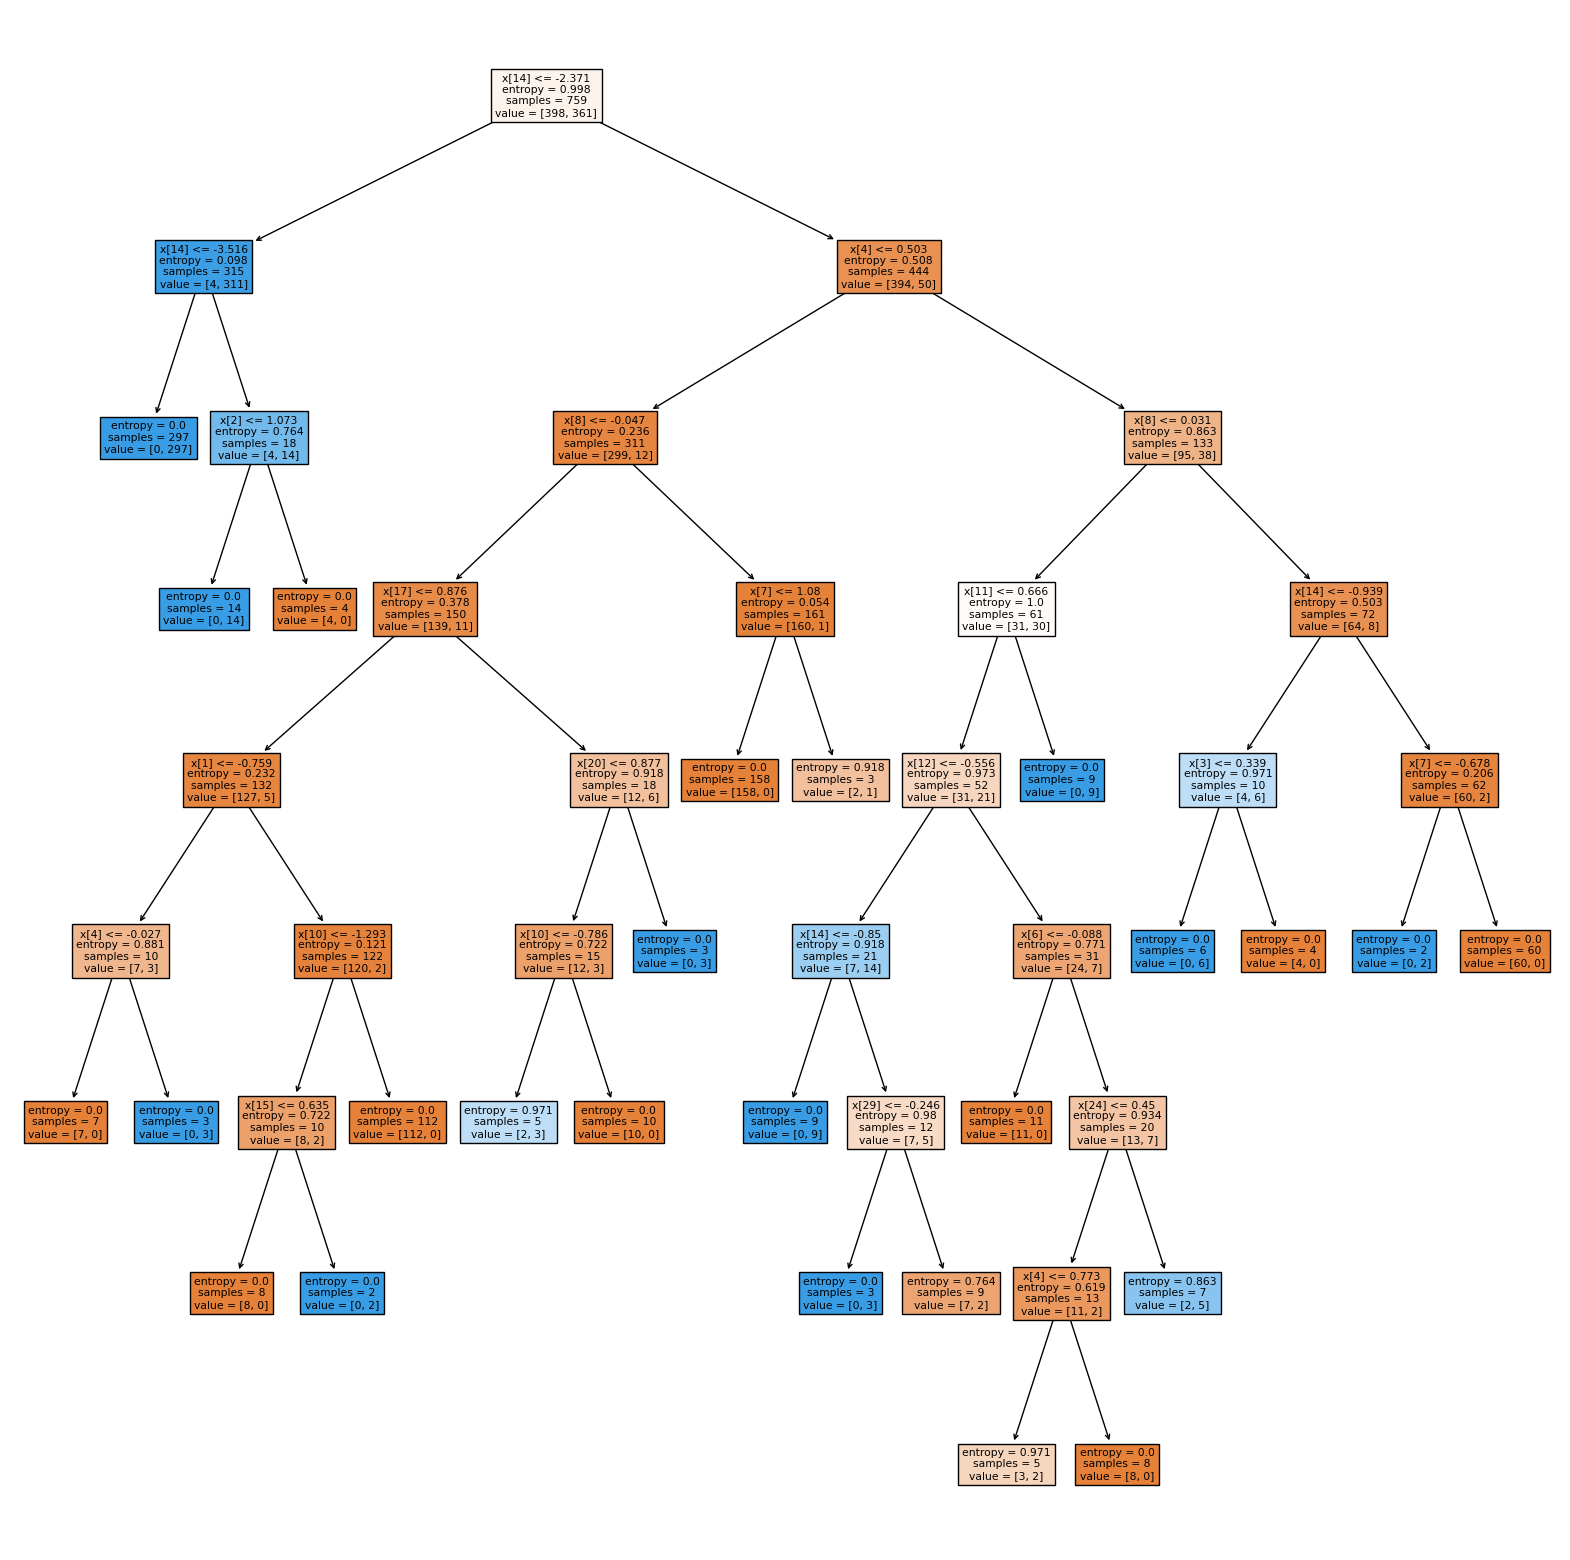

In [201]:
from sklearn import tree

plt.figure(figsize = (20, 20))
tree.plot_tree(bestmodel_DTC, filled = True)

plt.show()

In [202]:
Importance = bestmodel_DTC.feature_importances_
print(Importance)

ranked = sorted([(x, i) for (i, x) in enumerate(Importance)], reverse = True)

Highest_Importances = []

for x, i in ranked:
    Highest_Importances.append([x, i])
    if len(Highest_Importances) ==3:
        break

print('Most important variable is', Highest_Importances[0][1], 'Coefficient is', Highest_Importances[0][0])
print('Second most important variable is', Highest_Importances[1][1], 'Coefficient is', Highest_Importances[1][0])
print('Third most important variable is', Highest_Importances[2][1], 'Coefficient is', Highest_Importances[2][0])  

[0.         0.00976553 0.01878385 0.01325866 0.06736294 0.
 0.00711189 0.02561874 0.03467166 0.         0.01840463 0.01417979
 0.01014646 0.         0.73712534 0.00985817 0.         0.01299919
 0.         0.         0.00778409 0.         0.         0.
 0.00626445 0.         0.         0.         0.         0.0066646 ]
Most important variable is 14 Coefficient is 0.7371253433060846
Second most important variable is 4 Coefficient is 0.06736294375407745
Third most important variable is 8 Coefficient is 0.034671657780367494


We can see that the Decision Tree Classifier gives the top three important features are V14, V4, and V8. While in the correlation matrix, we have the most correlated variables to 'Class' are V14, V4, V11, and V12. The Decision Tree Classifier shows some consistency with the rough result we interpreted previously.

We could also see that V14 is the root node, which is much more important than other features (coefficient is 0.7994695224791236).

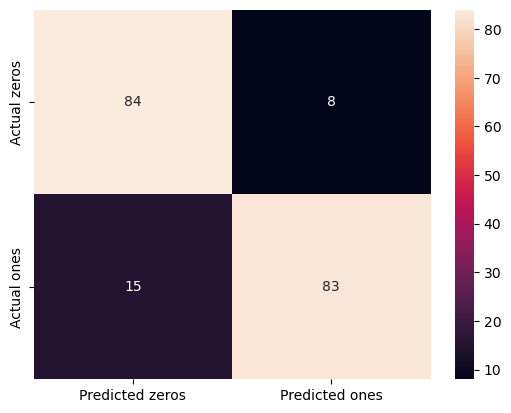

In [203]:
df_confusion_matrix_DTC = confusion_matrix(y_test, bestmodel_DTC.predict(X_test))

xlabels = ['Predicted zeros', 'Predicted ones']
ylabels = ['Actual zeros', 'Actual ones']
ax = sns.heatmap(df_confusion_matrix_DTC, annot = True, xticklabels = xlabels, yticklabels = ylabels)

plt.show()

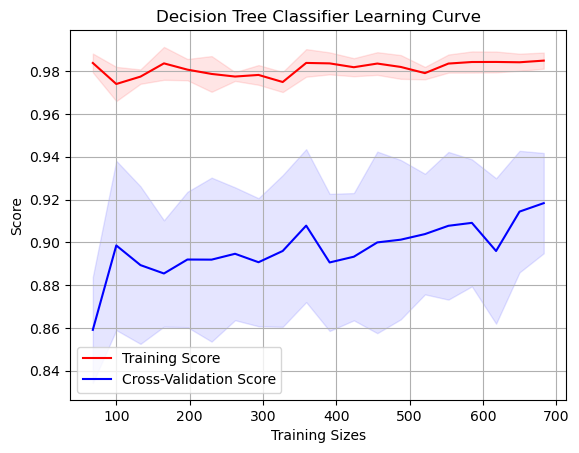

In [204]:
training_sizes = np.linspace(0.1, 1.0, 20)

training_sizes, training_score, test_score = learning_curve(
    bestmodel_DTC, X_train, y_train, cv = 10, train_sizes = training_sizes, scoring = 'accuracy'
)

training_score_mean = np.mean(training_score, axis = 1)
training_score_std = np.std(training_score, axis = 1)
test_score_mean = np.mean(test_score, axis = 1)
test_score_std = np.std(test_score, axis = 1)

plt.figure()

plt.title('Decision Tree Classifier Learning Curve')
plt.xlabel('Training Sizes')
plt.ylabel('Score')
plt.grid()

plt.plot(training_sizes, training_score_mean, color = 'r', label = 'Training Score')
plt.plot(training_sizes, test_score_mean, color = 'b', label = 'Cross-Validation Score')

plt.fill_between(
    training_sizes, training_score_mean - training_score_std, training_score_mean + training_score_std, alpha = 0.1, color = 'r'
)
plt.fill_between(
    training_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, alpha = 0.1, color = 'b'
)


plt.legend()
plt.show()

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_3625/1262102498.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_balanced[outlier_indices[i]].loc[df_balanced['Class'] == 0].values, fit = norm, ax = axes[i])
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_3625/1262102498.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mw

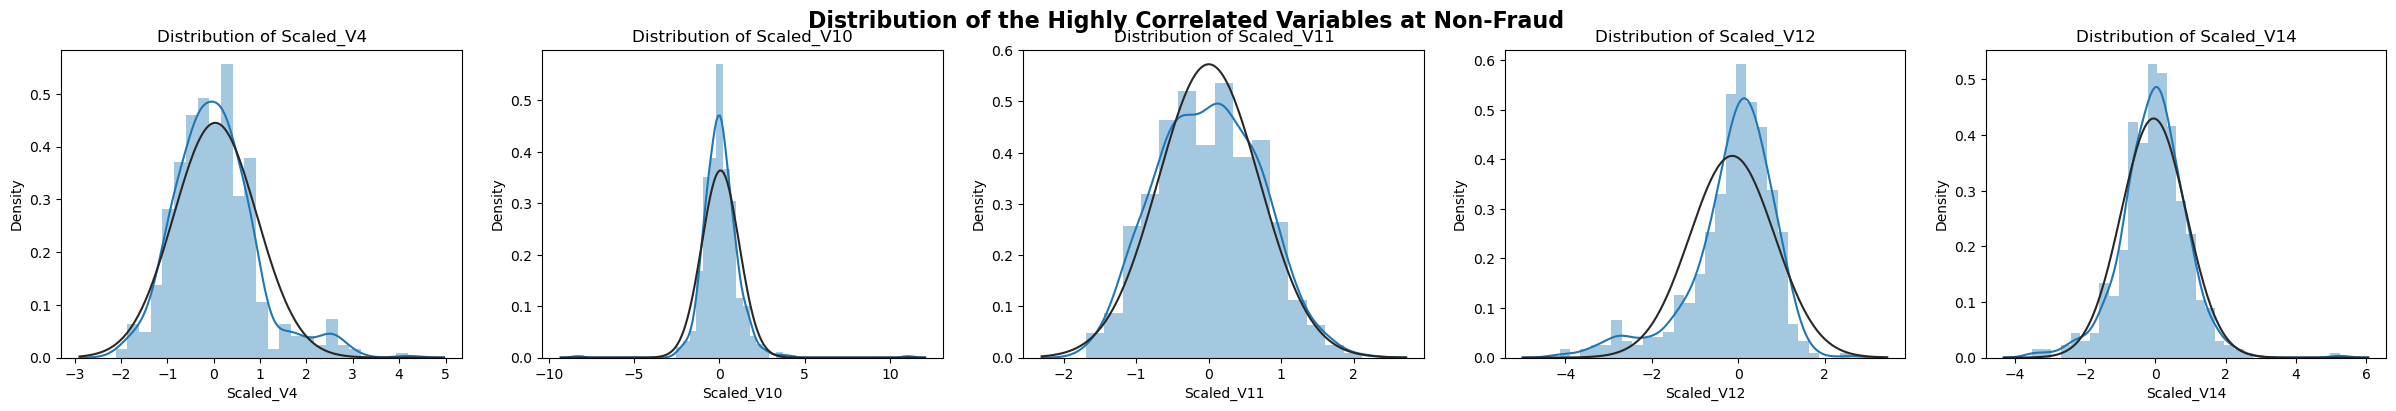

In [205]:
f, axes = plt.subplots(ncols = 5, figsize=(30, 4))
for i in range(5):
    sns.distplot(df_balanced[outlier_indices[i]].loc[df_balanced['Class'] == 0].values, fit = norm, ax = axes[i])
    axes[i].set_title('Distribution of ' + outlier_indices[i])
    axes[i].set_xlabel(outlier_indices[i])
f.suptitle('Distribution of the Highly Correlated Variables at Non-Fraud', fontsize=16, fontweight = 'bold')
plt.show()

0.9406032934756887
0.9218758117217642


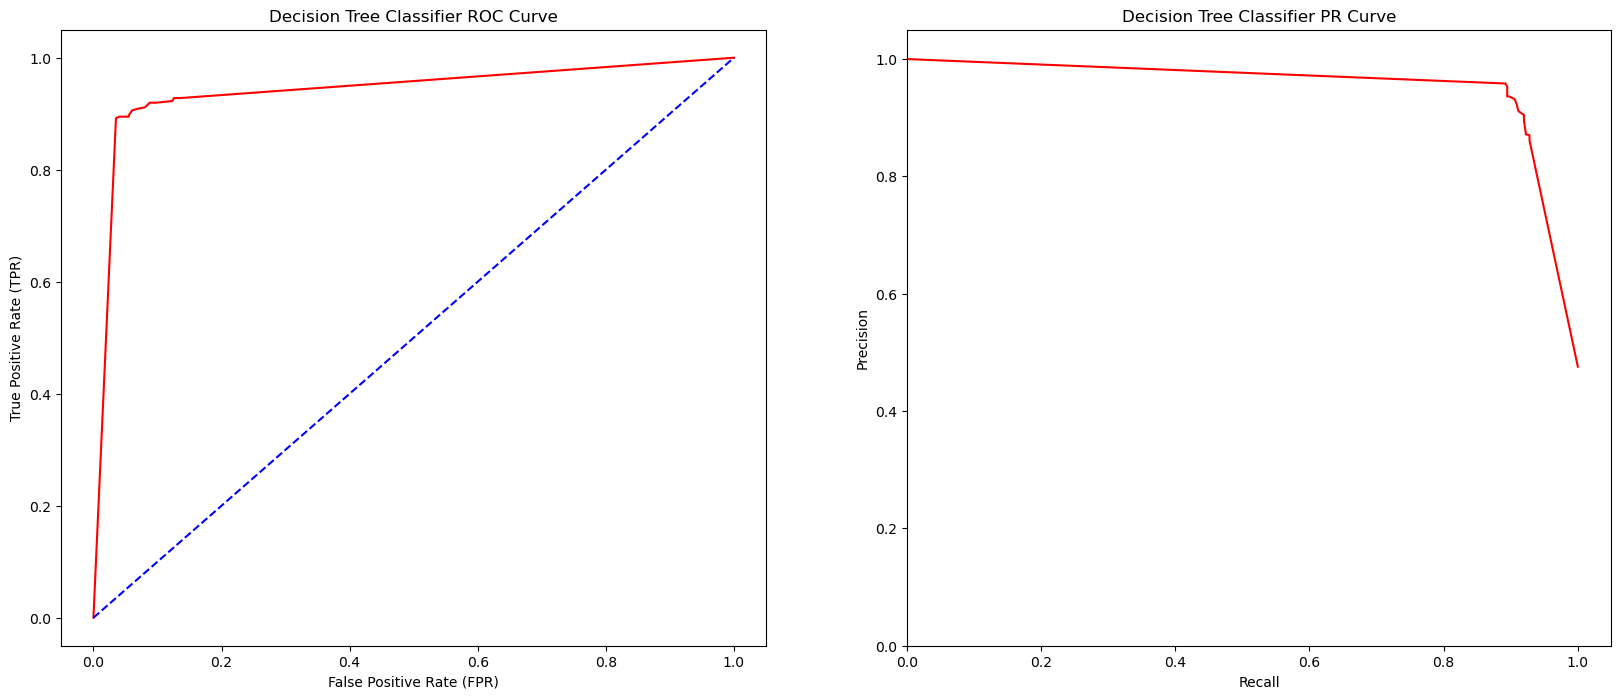

In [206]:
bestmodel_DTC_y_train_predicted = cross_val_predict(bestmodel_DTC, X_train, y_train, cv = 10, method = 'predict_proba')[:, 1]
bestmodel_ras_DTC = roc_auc_score(y_train, bestmodel_DTC_y_train_predicted)
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_train, bestmodel_DTC_y_train_predicted)
prs_DTC = average_precision_score(y_train, bestmodel_DTC_y_train_predicted)
precision, recall, _ = precision_recall_curve(y_train, bestmodel_DTC_y_train_predicted)
print(bestmodel_ras_DTC)
print(prs_DTC)
f, axes = plt.subplots(ncols=2, figsize = (20, 8))

axes[0].plot(fpr_logistic, tpr_logistic, color = 'r')
axes[0].plot([0, 1], [0, 1], color = 'b', linestyle = '--')
plt.xlim(-0.05, 1.05)
plt.ylim(0, 1.05)
axes[0].set_xlabel('False Positive Rate (FPR)')
axes[0].set_ylabel('True Positive Rate (TPR)')
axes[0].set_title('Decision Tree Classifier ROC Curve')


axes[1].plot(recall, precision, color = 'r')
plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Decision Tree Classifier PR Curve')

plt.show()